## Devops Section to download prepare image dataset

In [1]:
!mkdir ~/.kaggle
!cp "/content/drive/MyDrive/Colab Notebooks/kaggle.json"  ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [2]:
! kaggle competitions download -c dogs-vs-cats

 99% 803M/812M [00:12<00:00, 125MB/s]
100% 812M/812M [00:12<00:00, 66.2MB/s]


In [3]:
# Delete genrated folders
! rm -r /content/dogs-vs-cats
! rm -r /content/dogs-vs-cats-repo
! rm -r /content/dogs-vs-cats-repo-temp

rm: cannot remove '/content/dogs-vs-cats': No such file or directory
rm: cannot remove '/content/dogs-vs-cats-repo': No such file or directory
rm: cannot remove '/content/dogs-vs-cats-repo-temp': No such file or directory


In [4]:
!ls dogs-vs-cat | wc -l

ls: cannot access 'dogs-vs-cat': No such file or directory
0


In [3]:
# Copy local function to load data into folders
! cp "/content/drive/MyDrive/Deep Learning Class/image_loader_for_colab.py" /content/

## Main Program Starts Here

In [4]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import RMSprop

import os

import matplotlib.pyplot as plt

from image_loader_for_colab import load_dogs_vs_cats


In [5]:
source_file = r'/content/dogs-vs-cats.zip'
base_dir = r'/content/dogs-vs-cats'

In [6]:
train_dir, validation_dir, test_dir = load_dogs_vs_cats(source_file=source_file, base_dir=base_dir)

total training cat images:  1000
total validation cat images:  500
total test cat images:  500

total training dog images:  1000
total validation dog images:  500
total test dog images:  500


In [7]:
train_dir_cats = os.path.join(train_dir, 'cats')
train_dir_dogs =  os.path.join(train_dir, 'dogs')

print(train_dir_cats)
print(train_dir_dogs)

/content/dogs-vs-cats/train/cats
/content/dogs-vs-cats/train/dogs


In [8]:
fnames = [os.path.join(train_dir_cats, fname) for fname in os.listdir(train_dir_cats)]
len(fnames)

1000

## Get a sample and preview data augmentation

sample image  type:  <class 'PIL.Image.Image'>



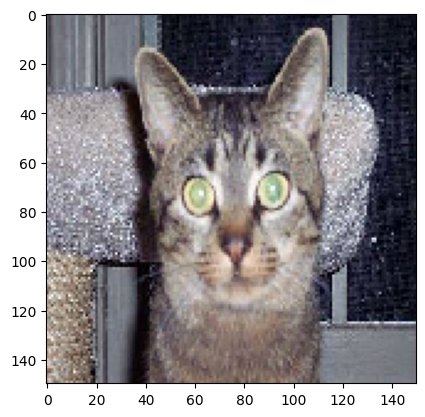

In [ ]:
sample_image = image.load_img(fnames[6], target_size=(150, 150))
print('sample image  type: ', type(sample_image))
print()
plt.imshow(sample_image);

In [ ]:
# Convert image into numpy matrix
sample_image_array = image.img_to_array(sample_image)
print('sample image array type: ', type(sample_image_array))
print('sample image array shape: ', sample_image_array.shape)

sample image array type:  <class 'numpy.ndarray'>
sample image array shape:  (150, 150, 3)


In [ ]:
# Add a dimenstion to make iamge compatible ro feed into model
# x = np.expand_dims(sample_image_array, axis=0)

# or may use:
x = np.reshape(sample_image_array, (1,) + sample_image_array.shape)

print('new sample image array shape: ', x.shape)

new sample image array shape:  (1, 150, 150, 3)


In [ ]:
#  create a data generator with augmentation
data_gen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    # rescale=1./255
)

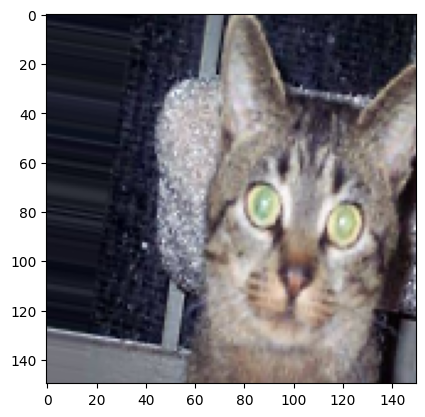

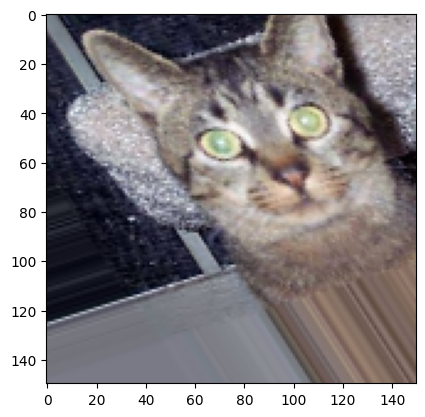

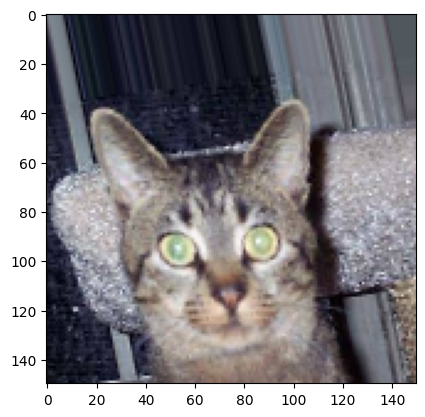

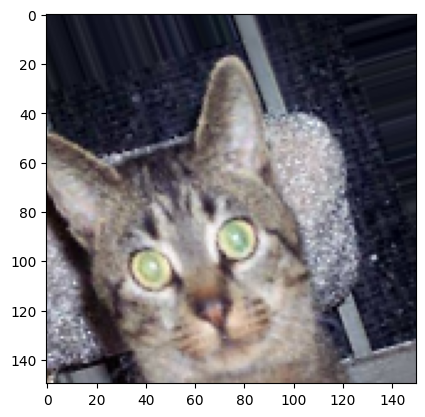

In [ ]:
# Lts see what happenes to an images by augmentation
i = 0
for batch in data_gen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()

## Prepare data and train by a model

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# test data must NOT be augmented.
test_data_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_data_gen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
%%time
history = model.fit(
    train_generator,
    # steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    # validation_steps=50,
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 345ms/step - accuracy: 0.4834 - loss: 0.6946 - val_accuracy: 0.5570 - val_loss: 0.6854
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 228ms/step - accuracy: 0.5417 - loss: 0.6886 - val_accuracy: 0.5280 - val_loss: 0.6804
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 227ms/step - accuracy: 0.5574 - loss: 0.6792 - val_accuracy: 0.5790 - val_loss: 0.6642
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 216ms/step - accuracy: 0.5623 - loss: 0.6727 - val_accuracy: 0.5780 - val_loss: 0.6638
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 226ms/step - accuracy: 0.5828 - loss: 0.6673 - val_accuracy: 0.6000 - val_loss: 0.6492
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 227ms/step - accuracy: 0.5921 - loss: 0.6586 - val_accuracy: 0.5990 - val_loss: 0.6434
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 226ms/step - accuracy: 0.6171 - loss: 0.6492 - val_accuracy: 0.6130 - val_loss: 0.6424
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 235ms/step - accuracy: 0.6101 - loss: 0.6492 - val_accuracy

In [16]:
# tf.keras.save_model(model, './models/Augmentation_cnn.keras')

keras.models.save_model(model, './models/Augmentation_cnn.keras')

In [17]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [24]:

print('max accuracy: ', max(history.history['accuracy']))
print('max validation accuracy: ', max(history.history['val_accuracy']))

print('min loss: ', max(history.history['loss']))
print('min validation loss: ', max(history.history['val_loss']))

max accuracy:  0.8119999766349792
max validation accuracy:  0.7979999780654907
min loss:  0.693206787109375
min validation loss:  0.69178307056427


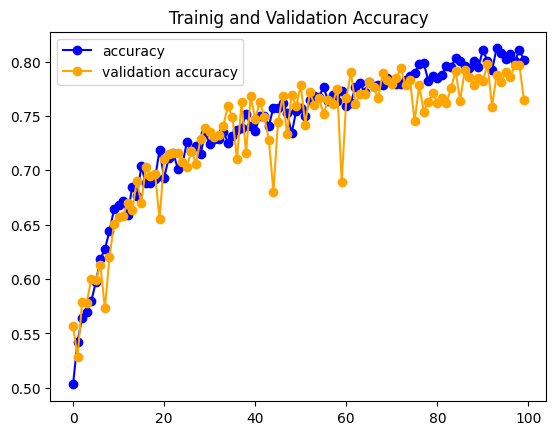

In [21]:
plt.plot(history.history['accuracy'], marker='o', color='blue',label='accuracy')
plt.plot(history.history['val_accuracy'], marker='o' ,color='orange' ,label='validation accuracy')
plt.title('Trainig and Validation Accuracy')

plt.legend()

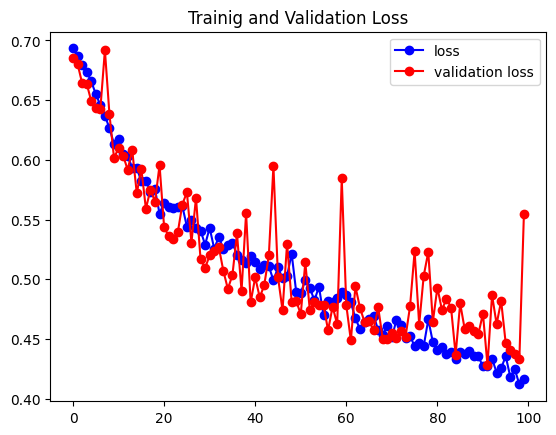

In [22]:
plt.plot(history.history['loss'],  marker='o', color='blue',label='loss')
plt.plot(history.history['val_loss'],  marker='o', color='red',label='validation loss')
plt.title('Trainig and Validation Loss')

plt.legend()